In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings. filterwarnings ('ignore')

In [207]:
file_name=r"C:\Users\hp\Downloads\datasets\irish flower\IRIS.csv"
df= pd.read_csv(file_name)


In [208]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [209]:
df.rename(columns={'sepal_length':'sl','sepal_width':'sw','petal_length':'pl','petal_width':'pw'}, inplace='True')

In [210]:
df

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [211]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [212]:
iris_setosa=df[df['species']=='Iris-setosa']
iris_versicolor=df[df['species']=='Iris-versicolor']
iris_virginica=df[df['species']=='Iris-virginica']

In [213]:
iris_setosa.shape

(50, 5)

<Axes: xlabel='pl', ylabel='Density'>

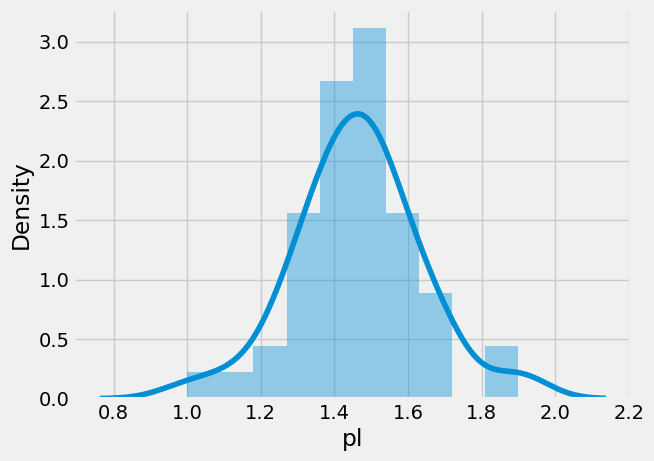

In [214]:
import seaborn as sns

sns.distplot(iris_setosa['pl'])

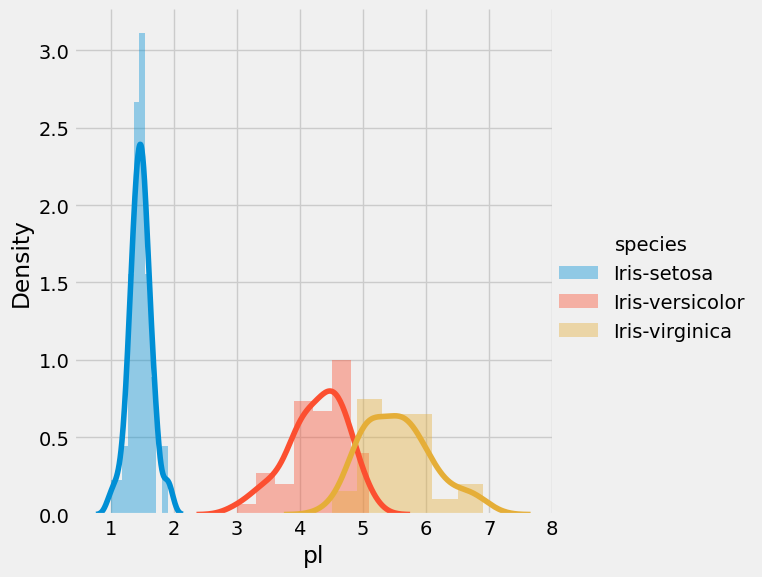

In [215]:
"""sns.FacetGrid(df, hue='species', height=6): This creates a FacetGrid object. A FacetGrid is used for plotting conditional relationships. 
The df parameter is the DataFrame where the data is stored. The hue parameter is used to color the data points by the ‘species’ column,
 which means that different species will be colored differently

.map(sns.distplot, 'pl'): The map method is used to apply a plotting function to each facet’s subset of the data. 
The sns.distplot function is passed as the first argument, which plots a univariate distribution of observations.
 The second argument 'pl' indicates that the distribution of the ‘pl’ column in the DataFrame df is to be plotted. 
 since ‘pl’ stands for petal length, for example, this would plot the distribution of petal length"""

sns.FacetGrid(df, hue='species', height=6).map(sns.distplot,'pl').add_legend()
#distplot gives pdf(probability density function is adddition to histrogram)

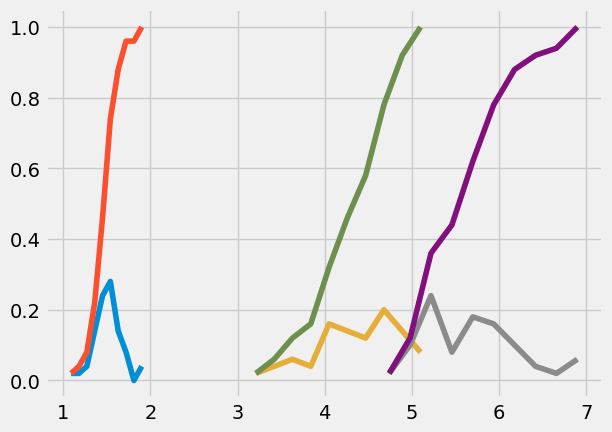

In [216]:
plt.style.use('fivethirtyeight')
counts, bin_edge= np.histogram(iris_setosa['pl'])
pdf= counts/sum(counts)

cdf=np.cumsum(pdf)

plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)

counts, bin_edge= np.histogram(iris_versicolor['pl'])
pdf= counts/sum(counts)

cdf=np.cumsum(pdf)

plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)

counts, bin_edge= np.histogram(iris_virginica['pl'])
pdf= counts/sum(counts)

cdf=np.cumsum(pdf)

plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)



In [217]:
df.head()

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


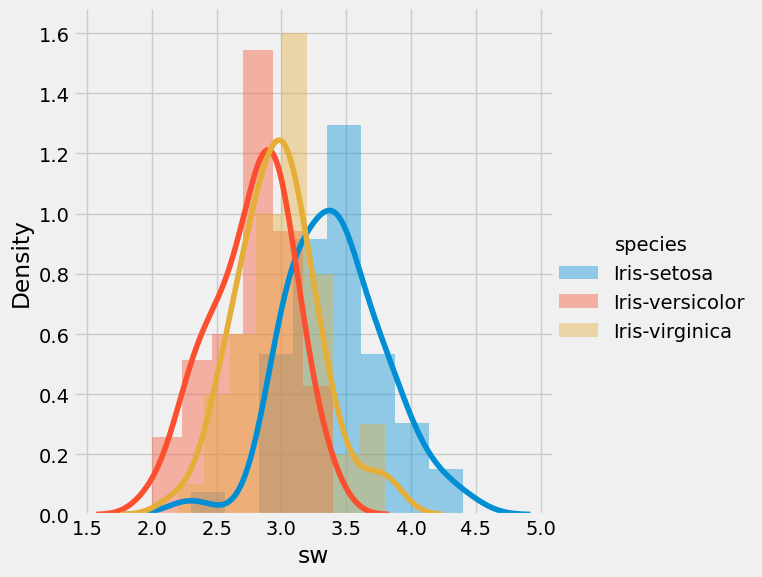

In [218]:
sns.FacetGrid(df, hue='species', height=6).map(sns.distplot,'sw').add_legend()


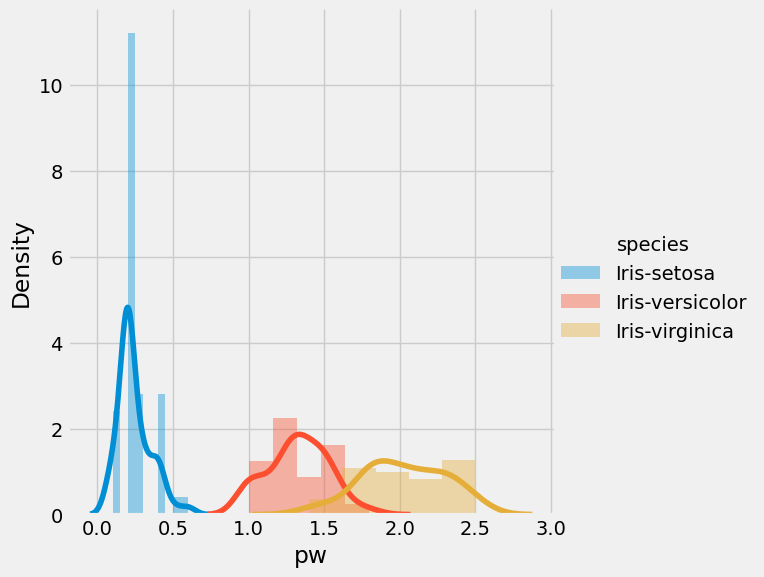

In [219]:
sns.FacetGrid(df, hue='species', height=6).map(sns.distplot,'pw').add_legend()


<h2>Relationship of the data features with the target

In [220]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [221]:
df['target']=df['species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
df

,sl,sw,pl,pw,species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


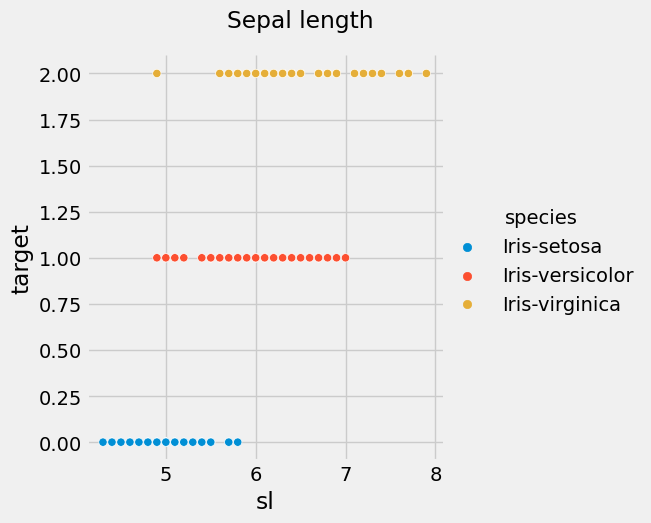

In [222]:
sns.relplot(x="sl", y='target', hue='species', data=df)
plt.suptitle('Sepal length', y=1.05)
plt.show()

<h1>Exploaratory data analysis (EDA)

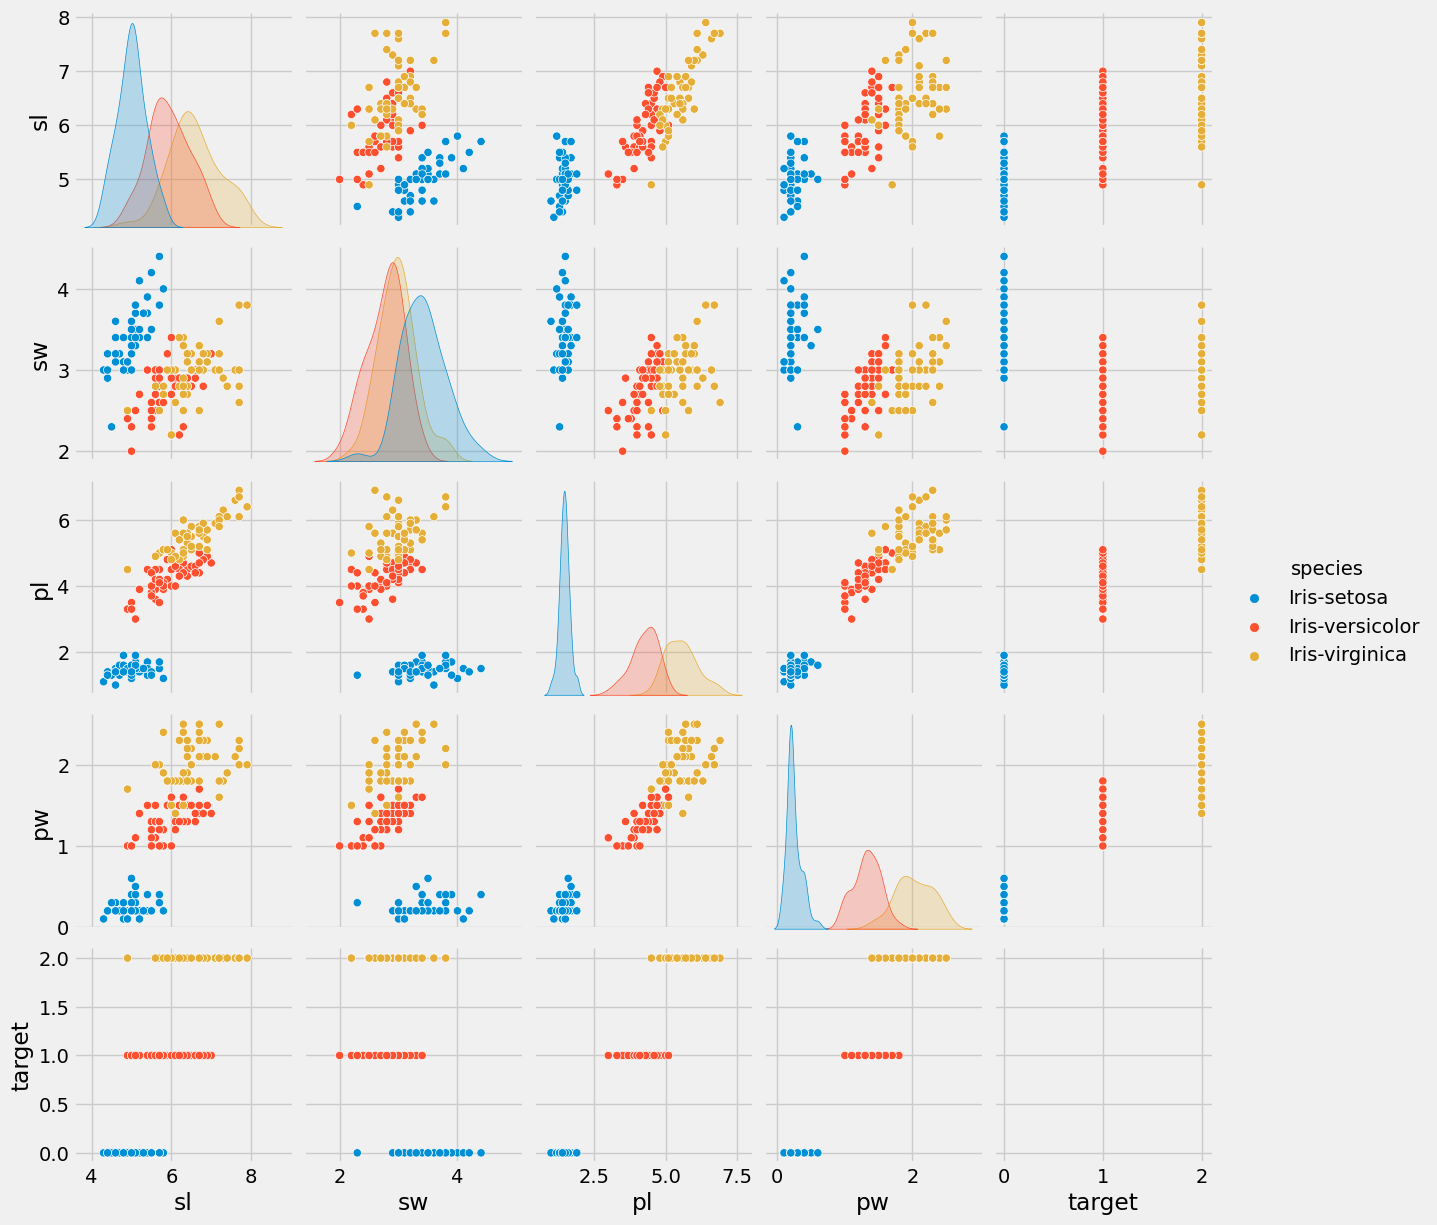

In [223]:
sns.pairplot(df, hue='species')

<h2> Train test split</h2>
Evaluate final model on the test set that hasn't been used at all in the train process.

(note: this might be a little less true if we use corss-validation)

In [224]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.25)

In [225]:
df_test.shape

(38, 6)

In [226]:
df_train.shape

(112, 6)

<h2> Prepare our data for modeling</h2>
splitting data back out into NumPy arrays

In [227]:
X_train=df_train.drop(columns=['species','target']).values
X_train.shape

(112, 4)

In [228]:
Y_train=df_train['target']

<h2> Modeling -Simple manual model

In [229]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [230]:
def single_feature_prediction(pl):
    if pl<2.5:
        return 0
    elif pl<4.8:
        return 1
    else:
        return 2

In [231]:
X_train

array([[5.9, 3. , 4.2, 1.5],
       [4.4, 3.2, 1.3, 0.2],
       [6.9, 3.2, 5.7, 2.3],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.5, 1.4, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3.9, 1.7, 0.4],
       [6.7, 3. , 5.2, 2.3],
       [6. , 3. , 4.8, 1.8],
       [5.1, 3.4, 1.5, 0.2],
       [6.3, 3.3, 4.7, 1.6],
       [6.4, 3.2, 5.3, 2.3],
       [6.7, 3.1, 4.7, 1.5],
       [5. , 3. , 1.6, 0.2],
       [7.2, 3.6, 6.1, 2.5],
       [5.4, 3.4, 1.5, 0.4],
       [6.4, 3.2, 4.5, 1.5],
       [7.7, 2.8, 6.7, 2. ],
       [5. , 3.5, 1.3, 0.3],
       [5.5, 2.4, 3.8, 1.1],
       [5.2, 2.7, 3.9, 1.4],
       [5.8, 2.6, 4. , 1.2],
       [5. , 3.3, 1.4, 0.2],
       [6.8, 3. , 5.5, 2.1],
       [6.3, 2.3, 4.4, 1.3],
       [5.7, 2.8, 4.5, 1.3],
       [5. , 3.6, 1.4, 0.2],
       [6.4, 2.7, 5.3, 1.9],
       [6.2, 2.9, 4.3, 1.3],
       [5.2, 3.5, 1.5, 0.2],
       [6.4, 2.8, 5.6, 2.2],
       [6.7, 3.3, 5.7, 2.5],
       [5.8, 4. , 1.2, 0.2],
       [5.5, 4.2, 1.4, 0.2],
       [7.7, 2

In [232]:
manual_y_prediction=np.array([single_feature_prediction(val) for val in X_train[:,2]])


In [233]:
manual_model_accuracy=np.mean(manual_y_prediction==Y_train)*100

In [285]:
print(f"the accuarcy of manual model: {manual_model_accuracy:.2f}%")

the accuarcy of manual model: 95.54%


<h2> Modeling -Logistic Regression

In [235]:
from sklearn.linear_model import LogisticRegression

<h4><b>Using validation set to evaluate the model

In [236]:
model = LogisticRegression()

In [237]:
#Xt stands for X_train and Xv stands for X_validation
Xt, Xv, Yt, Yv  =train_test_split(X_train, Y_train, test_size=0.25)


In [238]:
Xt.shape

(84, 4)

In [239]:
Xv.shape

(28, 4)

In [240]:
model.fit(Xt, Yt)

LogisticRegression()

In [241]:
y_pred= model.predict(Xv)


In [242]:
np.mean(y_pred==Yv)

1.0

In [243]:
model.score(Xv, Yv)

1.0

<h2>Using cross-validation to evaluate model

In [245]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [248]:
model= LogisticRegression(max_iter=200)

accuracy=cross_val_score(model, X_train, Y_train, cv=5, scoring="accuracy")

In [249]:
np.mean(accuracy)

0.9644268774703558

<h3>Check for misclassified points

In [251]:
y_pred=cross_val_predict(model, X_train, Y_train, cv=5)
y_pred

array([1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 0, 1, 2, 0, 1, 1, 1,
       0, 2, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 1, 2, 0,
       2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0,
       2, 1, 1, 2, 0, 2, 2, 1, 2, 1, 0, 2, 2, 0, 1, 1, 0, 2, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 2, 2,
       2, 1], dtype=int64)

In [258]:
predicted_correctly_mask=y_pred==Y_train

In [259]:
not_predicted_correctly=~predicted_correctly_mask

In [260]:
X_train[not_predicted_correctly]

array([[4.9, 2.5, 4.5, 1.7],
       [6.3, 2.8, 5.1, 1.5],
       [6.7, 3. , 5. , 1.7],
       [5.9, 3.2, 4.8, 1.8]])

In [261]:
df_prediction=df_train.copy()

In [262]:
df_prediction['correct_prediction']=predicted_correctly_mask

In [263]:
df_prediction.head()

,sl,sw,pl,pw,species,target,correct_prediction
61,5.9,3.0,4.2,1.5,Iris-versicolor,1,True
42,4.4,3.2,1.3,0.2,Iris-setosa,0,True
120,6.9,3.2,5.7,2.3,Iris-virginica,2,True
34,4.9,3.1,1.5,0.1,Iris-setosa,0,True
0,5.1,3.5,1.4,0.2,Iris-setosa,0,True


In [264]:
df_prediction['prediction']=y_pred

In [269]:
df_prediction['prediction_label']=df_prediction['prediction'].map({0:'iris_setosa',1:'iris_versicolor',2:'iris_virginica'})

In [270]:
df_prediction.head()

,sl,sw,pl,pw,species,target,correct_prediction,prediction,predcition_label,prediction_label
61,5.9,3.0,4.2,1.5,Iris-versicolor,1,True,1,iris_versicolor,iris_versicolor
42,4.4,3.2,1.3,0.2,Iris-setosa,0,True,0,iris_setosa,iris_setosa
120,6.9,3.2,5.7,2.3,Iris-virginica,2,True,2,iris_virginica,iris_virginica
34,4.9,3.1,1.5,0.1,Iris-setosa,0,True,0,iris_setosa,iris_setosa
0,5.1,3.5,1.4,0.2,Iris-setosa,0,True,0,iris_setosa,iris_setosa


<Axes: xlabel='pl', ylabel='pw'>

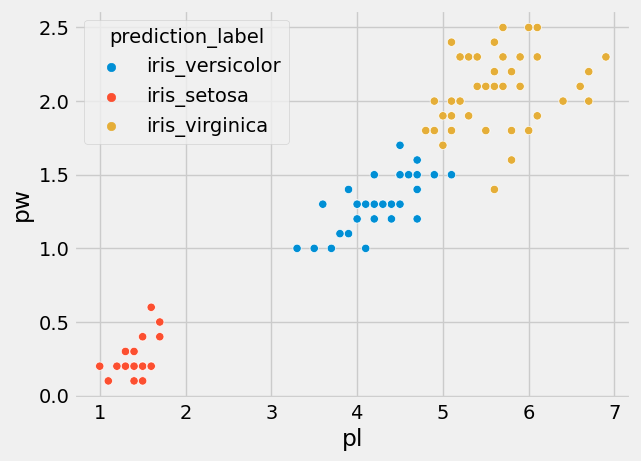

In [271]:
sns.scatterplot(x='pl', y='pw',hue='prediction_label',data=df_prediction)

<Axes: xlabel='pl', ylabel='pw'>

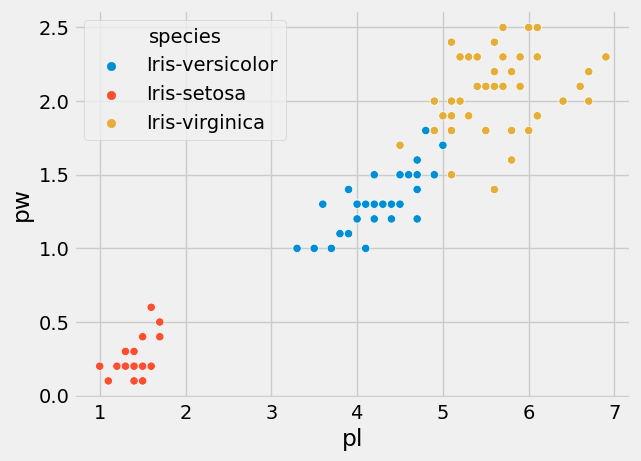

In [272]:
sns.scatterplot(x='pl', y='pw',hue='species',data=df_prediction)

In [280]:
def plot_incorrect_predictions(df_prediction, x_axis_feature, y_axis_feature):
    fig, axs= plt.subplots(2,2, figsize=(10,10))
    axs=axs.flatten()
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='prediction_label', data=df_prediction, ax=axs[0])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='species', data=df_prediction, ax=axs[1])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue='correct_prediction', data=df_prediction, ax=axs[2])
    axs[3].set_visible(False)
    plt.show()

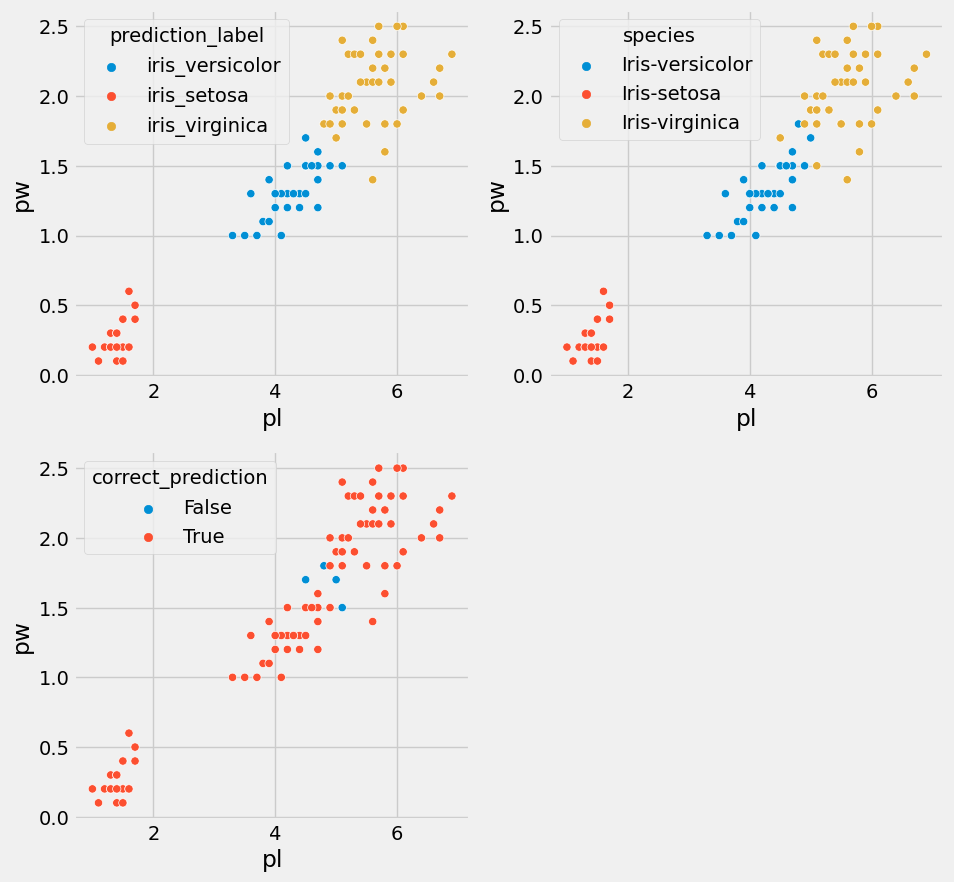

In [281]:
plot_incorrect_predictions(df_prediction, 'pl', 'pw')

<h2>Model Tuning</h2>
Determining the parameter of the model(hyperparameter) that maximize the model performance

In [300]:
for reg_param in (1,1.8, 2, 2.6, 2.8, 3, 3.5,5, 6, 10, 25, 100,250,500):
    print(reg_param)
    model= LogisticRegression(max_iter=200, C=reg_param)
    accuracies=cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
    print(f"accuracy: {np.mean(accuracies)*100:.2f}%")

1
accuracy: 96.44%
1.8
accuracy: 96.44%
2
accuracy: 96.44%
2.6
accuracy: 96.44%
2.8
accuracy: 96.44%
3
accuracy: 96.44%
3.5
accuracy: 96.44%
5
accuracy: 97.31%
6
accuracy: 97.31%
10
accuracy: 97.31%
25
accuracy: 98.22%
100
accuracy: 98.22%
250
accuracy: 98.22%
500
accuracy: 97.31%


<h2> Final Model

In [301]:
model= LogisticRegression(max_iter=200, C=25)


<h4>check the model on test set

In [302]:
X_test = df_test.drop(columns=['species', 'target']).values
y_test = df_test['target'].values


<h3>Train the final model using full Training Dataset

In [303]:
model.fit(X_train, Y_train)


LogisticRegression(C=25, max_iter=200)

In [311]:
params = model.get_params()
params

{'C': 25,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [304]:
Y_test_pred= model.predict(X_test)


In [305]:
test_set_correctly_classified=Y_test_pred==y_test
test_set_accuracy=np.mean(test_set_correctly_classified)

In [306]:
print(f"Test set accuracy: {test_set_accuracy*100:.2f}")

Test set accuracy: 97.37


In [307]:
test_set_correctly_classified

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [308]:
df_prediction_test= df_test.copy()
df_prediction_test['correct_prediction']=test_set_correctly_classified
df_prediction_test['prediction']=Y_test_pred

df_prediction_test['prediction_label']=df_prediction_test['prediction'].map({0:'iris_setosa',1:'iris_versicolor',2:'iris_virginica'})

In [309]:
df_prediction_test.head()

,sl,sw,pl,pw,species,target,correct_prediction,prediction,prediction_label
26,5.0,3.4,1.6,0.4,Iris-setosa,0,True,0,iris_setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,0,True,0,iris_setosa
84,5.4,3.0,4.5,1.5,Iris-versicolor,1,True,1,iris_versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor,1,True,1,iris_versicolor
103,6.3,2.9,5.6,1.8,Iris-virginica,2,True,2,iris_virginica


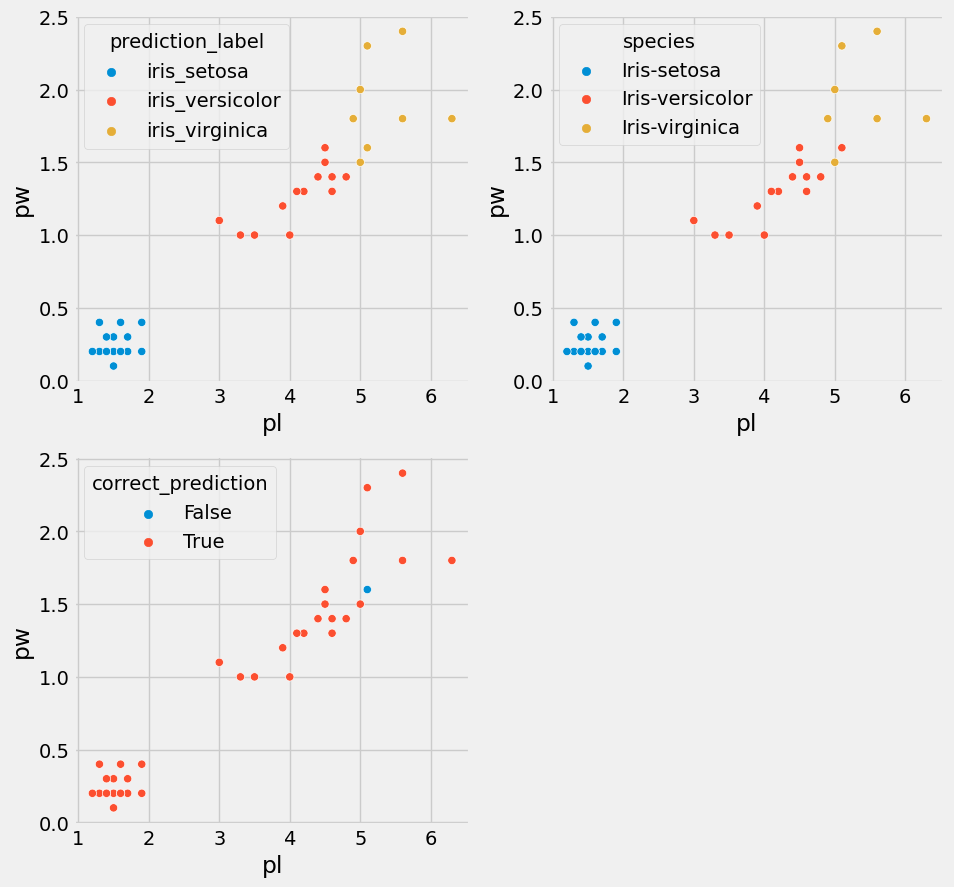

In [310]:
plot_incorrect_predictions(df_prediction_test, 'pl','pw')

<h2>In conclusion</h2>
In conclusion, we acheived a 97% accuracy on the tst dataset using a Logistic Regression model with model paramters:

'C': 25,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False